In [1]:
%matplotlib inline

import fiona
import rasterio
from rasterio.tools.mask import mask
import numpy as np
import pandas as pd
import progressbar
import os 

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.cm as cm

import itertools
from collections import deque

import scipy.stats
import scipy.spatial.distance

import Data, Figures, Models

Data = reload(Data)
Figures = reload(Figures)
Models = reload(Models)

from IPython.display import display, HTML

figureOutputDir = "/home/caleb/Dropbox/CalebBistra/Papers/PNAS_2016/figures/"

In [2]:
startSeaLevelRise = 0
stopSeaLevelRise = 10
seaLevelRiseRange = range(startSeaLevelRise,stopSeaLevelRise+1)

startYear = 2013
stopYear = 2013
yearRange = range(startYear,stopYear+1)


populationDataSets, migrationDataSets = Data.loadMigrationPopulationDataset(yearRange, zeroSelfMigration=False)
        
countyIds = Data.loadCounties()
countyIdMap = {countyId:i for i,countyId in enumerate(countyIds)} #mapping from countyId to position in list
countyIndex_IdMap = {i:countyId for i,countyId in enumerate(countyIds)}
countyNameMapping = Data.loadCountyNameMap() #mapping from countyId to name
numCounties = len(countyIds)

distanceMatrix = Data.loadCountyPairwiseDistanceMatrix()

Loading the distance matrix


# Outgoing Migrants Over Population including Self-Migrations

Slope of best fit linear:  0.816740366848
Average of outgoing/population:  0.770280061067


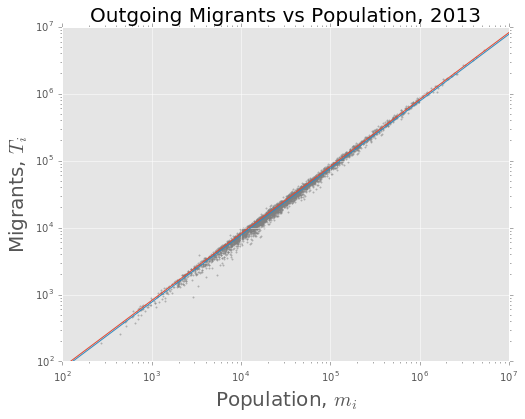

Num zeros: 2


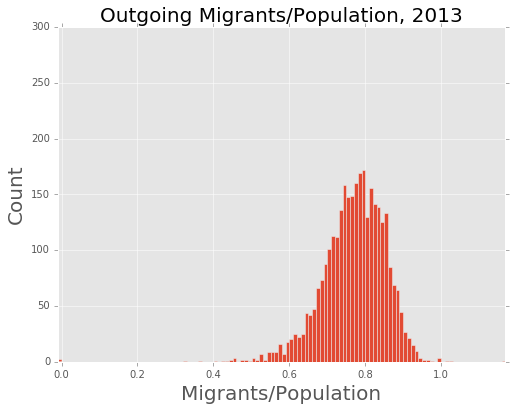

In [34]:
x = []
y = []

vals = []

for i in range(numCounties):
        
    outgoingMigrants = float(sum(migrationDataSets[0][i,:]))
    incomingMigrants = float(sum(migrationDataSets[0][:,i]))
    selfMigrants = float(migrationDataSets[0][i,i])
    population = populationDataSets[0][i]
    
    x.append(population)
    y.append(outgoingMigrants)
    
    vals.append(outgoingMigrants/population)

    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_ylabel('Migrants, $T_i$', size=20)
ax.set_xlabel('Population, $m_i$', size=20)
ax.set_title('Outgoing Migrants vs Population, %d' % (2013), size=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([1e2, 1e7, 1e2, 1e7])
coeffs = np.polyfit(x,y,1)
print "Slope of best fit linear: ",coeffs[0]
#polyFunction = np.poly1d(coeffs)
xs = np.linspace(0,10**8,num=100000)
#ys = polyFunction(xs)
ys = xs*coeffs[0]
ax.plot(xs,ys)
ax.scatter(x,y,s=2,color='grey',alpha=0.45, zorder=0)

newSlope = sum(vals)/float(len(vals))
print "Average of outgoing/population: ",newSlope
ys = xs*newSlope
ax.plot(xs,ys)
plt.savefig("/home/caleb/Dropbox/CalebBistra/Reports/MigrationModelingSanity_Report_8_29_2016/figures/all_graph.png",dpi=100)
plt.show()
plt.close()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
binwidth = 0.01
n, bins, patches = ax.hist(vals, bins=np.arange(0-binwidth+0.001, max(vals)+binwidth, binwidth))
ax.set_xlim([0-binwidth+0.001,max(vals)])
ax.set_ylim([0,300])
ax.set_title('Outgoing Migrants/Population, %d' % (2013), size=20)
ax.set_xlabel("Migrants/Population", size=20)
ax.set_ylabel("Count", size=20)

vals = np.array(vals)
print "Num zeros: %d" % (np.sum(vals==0))
plt.savefig("/home/caleb/Dropbox/CalebBistra/Reports/MigrationModelingSanity_Report_8_29_2016/figures/all_distribution.png",dpi=100)
plt.show()
plt.close()

Slope of best fit linear:  0.0313670997746
Average of outgoing/population:  0.022076582888


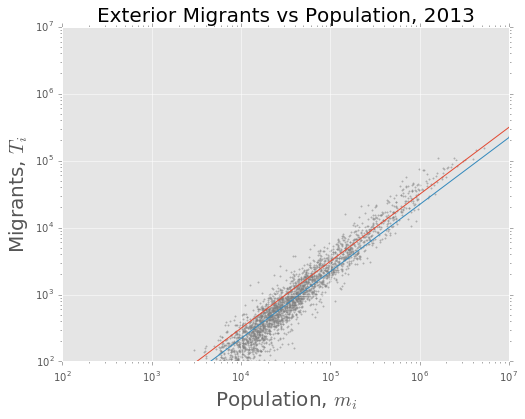

Num zeros: 297


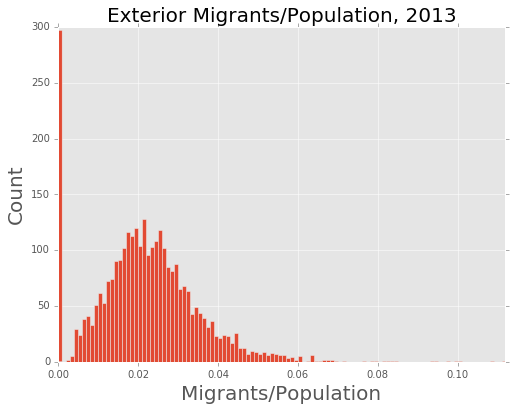

In [35]:
x = []
y = []

vals = []

for i in range(numCounties):
        
    outgoingMigrants = float(sum(migrationDataSets[0][i,:]) - migrationDataSets[0][i,i])
    selfMigrants = float(migrationDataSets[0][i,i])
    population = populationDataSets[0][i]
    
    x.append(population)
    y.append(outgoingMigrants)
    
    vals.append(outgoingMigrants/population)

    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('Migrants, $T_i$', size=20)
ax.set_xlabel('Population, $m_i$', size=20)
ax.set_title('Exterior Migrants vs Population, %d' % (2013), size=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([1e2, 1e7, 1e2, 1e7])
coeffs = np.polyfit(x,y,1)
print "Slope of best fit linear: ",coeffs[0]
#polyFunction = np.poly1d(coeffs)
xs = np.linspace(0,10**8,num=100000)
#ys = polyFunction(xs)
ys = xs*coeffs[0]
ax.plot(xs,ys)
ax.scatter(x,y,s=2,color='grey',alpha=0.45, zorder=0)
newSlope = sum(vals)/float(len(vals))
print "Average of outgoing/population: ",newSlope
ys = xs*newSlope
ax.plot(xs,ys)
plt.savefig("/home/caleb/Dropbox/CalebBistra/Reports/MigrationModelingSanity_Report_8_29_2016/figures/exterior_graph.png",dpi=100)
plt.show()
plt.close()


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
binwidth = 0.001
n, bins, patches = ax.hist(vals, bins=np.arange(0, max(vals)+binwidth, binwidth))
ax.set_xlim([0-binwidth+0.001,max(vals)])
ax.set_ylim([0,300])
ax.set_title('Exterior Migrants/Population, %d' % (2013), size=20)
ax.set_xlabel("Migrants/Population", size=20)
ax.set_ylabel("Count", size=20)
vals = np.array(vals)
print "Num zeros: %d" % (np.sum(vals==0))
plt.savefig("/home/caleb/Dropbox/CalebBistra/Reports/MigrationModelingSanity_Report_8_29_2016/figures/exterior_distribution.png",dpi=100)
plt.show()
plt.close()

Slope of best fit linear:  0.785373267073
Average of outgoing/population:  0.748203478179


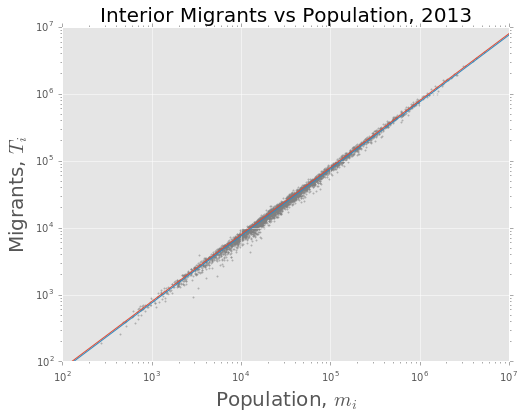

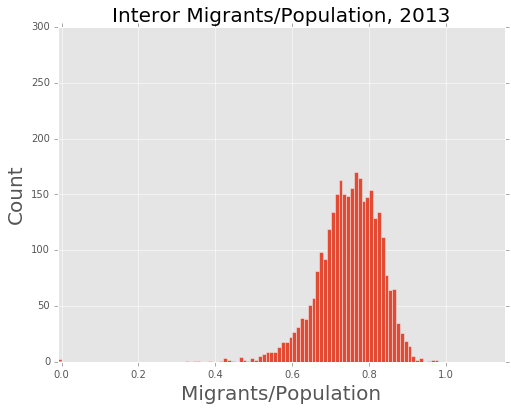

In [70]:
x = []
y = []

vals = []

for i in range(numCounties):
        
    outgoingMigrants = float(migrationDataSets[0][i,i])
    selfMigrants = float(migrationDataSets[0][i,i])
    population = populationDataSets[0][i]
    
    x.append(population)
    y.append(outgoingMigrants)
    
    vals.append(outgoingMigrants/population)

    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_ylabel('Migrants, $T_i$', size=20)
ax.set_xlabel('Population, $m_i$', size=20)
ax.set_title('Interior Migrants vs Population, %d' % (2013), size=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([1e2, 1e7, 1e2, 1e7])
coeffs = np.polyfit(x,y,1)
print "Slope of best fit linear: ",coeffs[0]
#polyFunction = np.poly1d(coeffs)
xs = np.linspace(0,10**8,num=100000)
#ys = polyFunction(xs)
ys = xs*coeffs[0]
ax.plot(xs,ys)
ax.scatter(x,y,s=2,color='grey',alpha=0.45, zorder=0)

newSlope = sum(vals)/float(len(vals))
print "Average of outgoing/population: ",newSlope
ys = xs*newSlope
ax.plot(xs,ys)
plt.savefig("/home/caleb/Dropbox/CalebBistra/Reports/MigrationModelingSanity_Report_8_29_2016/figures/interior_graph.png",dpi=100)
plt.show()
plt.close()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
binwidth = 0.01
n, bins, patches = ax.hist(vals, bins=np.arange(0-binwidth+0.001, max(vals)+binwidth, binwidth))
ax.set_xlim([0-binwidth+0.001,max(vals)])
ax.set_ylim([0,300])
ax.set_title('Interor Migrants/Population, %d' % (2013), size=20)
ax.set_xlabel("Migrants/Population", size=20)
ax.set_ylabel("Count", size=20)
plt.savefig("/home/caleb/Dropbox/CalebBistra/Reports/MigrationModelingSanity_Report_8_29_2016/figures/interior_distribution.png",dpi=100)
plt.show()
plt.close()

# Incoming Migrants Over Population including Self-Migrations

Slope of best fit linear:  0.814265299502
Average of outgoing/population:  0.769982423747


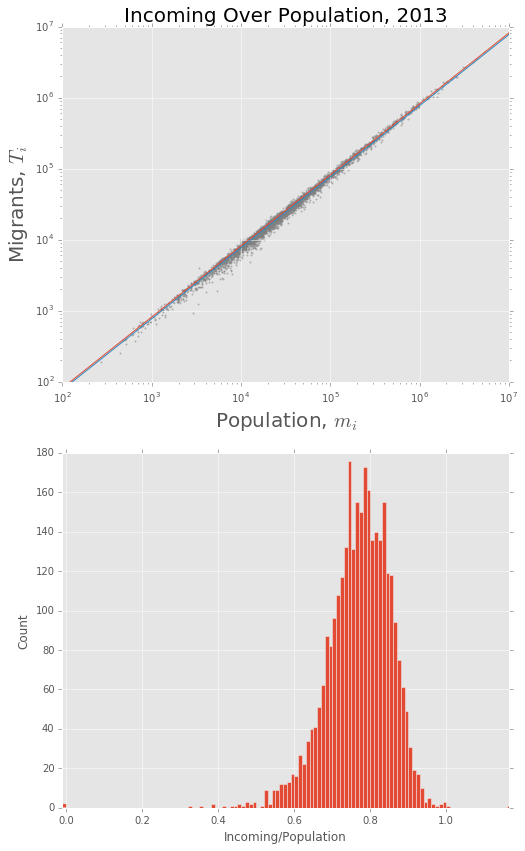

In [8]:
x = []
y = []

vals = []

for i in range(numCounties):
        
    outgoingMigrants = float(sum(migrationDataSets[0][i,:]))
    incomingMigrants = float(sum(migrationDataSets[0][:,i]))
    selfMigrants = float(migrationDataSets[0][i,i])
    population = populationDataSets[0][i]
    
    x.append(population)
    y.append(incomingMigrants)
    
    vals.append(incomingMigrants/population)

    
fig, axs = plt.subplots(2, 1, figsize=(8, 14))
ax = axs[0]
ax.set_ylabel('Migrants, $T_i$', size=20)
ax.set_xlabel('Population, $m_i$', size=20)
ax.set_title('Incoming Over Population, %d' % (2013), size=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([1e2, 1e7, 1e2, 1e7])
coeffs = np.polyfit(x,y,1)
print "Slope of best fit linear: ",coeffs[0]
#polyFunction = np.poly1d(coeffs)
xs = np.linspace(0,10**8,num=100000)
#ys = polyFunction(xs)
ys = xs*coeffs[0]
ax.plot(xs,ys)
ax.scatter(x,y,s=2,color='grey',alpha=0.45, zorder=0)

newSlope = sum(vals)/float(len(vals))
print "Average of outgoing/population: ",newSlope
ys = xs*newSlope
ax.plot(xs,ys)

ax = axs[1]
binwidth = 0.01
n, bins, patches = ax.hist(vals, bins=np.arange(0-binwidth+0.001, max(vals)+binwidth, binwidth))
ax.set_xlim([0-binwidth+0.001,max(vals)])
ax.set_ylim([0,300])
ax.set_xlabel("Incoming/Population")
ax.set_ylabel("Count")

plt.show()

# Testing Re-Derivation

In [50]:
alpha = 0.05
beta = 0.78
m = 1000
A = np.linspace(0,1,1000)

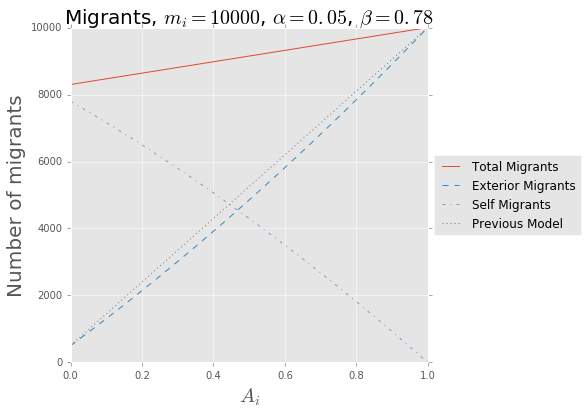

(array([], dtype=int64),)


In [73]:
x = []
migrants = []
outgoingMigrants = []
selfMigrants = []

previousMigrants = []

for a in A:
    x.append(a)
    
    p = (alpha+beta)*(1-a)*m+a*m
    tempOutgoing = ((alpha)/(alpha+beta)) * p + ((beta)/(alpha+beta)) * a * p
    tempSelf = (1-a) * ((beta)/(alpha+beta)) * p
    
    migrants.append(p)
    outgoingMigrants.append(tempOutgoing)
    selfMigrants.append(tempSelf)
    
    previousMigrants.append(a*m + alpha*(1-a)*m)

x = np.array(x)
migrants = np.array(migrants)
outgoingMigrants = np.array(outgoingMigrants)
selfMigrants = np.array(selfMigrants)

previousMigrants = np.array(previousMigrants)
    
fig,ax = plt.subplots(1,1,figsize=(8,6))
plt.plot(x,migrants,linestyle="-",label="Total Migrants")
plt.plot(x,outgoingMigrants,linestyle="--",label="Exterior Migrants")
plt.plot(x,selfMigrants,linestyle="-.",label="Self Migrants")

plt.plot(x,previousMigrants,linestyle=":",label="Previous Model")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("$A_i$",size=20)
plt.ylabel("Number of migrants",size=20)
plt.title("Migrants, $m_i=%d$, $\\alpha=%0.2f$, $\\beta=%0.2f$" % (m,alpha,beta),size=20)
plt.savefig("/home/caleb/Dropbox/CalebBistra/Reports/MigrationModelingSanity_Report_8_29_2016/figures/model_behaviour.png", dpi=100)
plt.show()

print np.where(outgoingMigrants==selfMigrants)

## Fit Parameter Tests

In [74]:
startSeaLevelRise = 0
stopSeaLevelRise = 10
seaLevelRiseRange = range(startSeaLevelRise,stopSeaLevelRise+1)

startYear = 2004
stopYear = 2013
yearRange = range(startYear,stopYear+1)


populationDataSets, migrationDataSets = Data.loadMigrationPopulationDataset(yearRange, zeroSelfMigration=False)
        
countyIds = Data.loadCounties()
countyIdMap = {countyId:i for i,countyId in enumerate(countyIds)} #mapping from countyId to position in list
countyIndex_IdMap = {i:countyId for i,countyId in enumerate(countyIds)}
countyNameMapping = Data.loadCountyNameMap() #mapping from countyId to name

distanceMatrix = Data.loadCountyPairwiseDistanceMatrix()

Loading the distance matrix


In [75]:
fitParameters = [] #one for each year

alphaVals = []
betaVals = []

for i,year in enumerate(yearRange):
    print "Calculating num migrants by population fit for %d" % (year)
    
    popVals = []
    exteriorMigrants = []
    interiorMigrants = []
    for j,countyId in enumerate(countyIds):
        popVals.append(populationDataSets[i][j])
        exteriorMigrants.append(np.sum(migrationDataSets[i][j,:])-migrationDataSets[i][j,j])
        interiorMigrants.append(migrationDataSets[i][j,j])
        
    popVals = np.array(popVals)
    exteriorMigrants = np.array(exteriorMigrants)
    interiorMigrants = np.array(interiorMigrants)

    alpha = np.polyfit(popVals, exteriorMigrants, 1)[0]
    beta = np.polyfit(popVals, interiorMigrants, 1)[0]
    
    print alpha,beta
    
    alphaVals.append(alpha)
    betaVals.append(beta)
    fitParameters.append([alpha,beta])

Calculating num migrants by population fit for 2004
0.0277888999379 0.724239606965
Calculating num migrants by population fit for 2005
0.0292561057524 0.718933233061
Calculating num migrants by population fit for 2006
0.0277299696906 0.722796250458
Calculating num migrants by population fit for 2007
0.0286675509286 0.744887252119
Calculating num migrants by population fit for 2008
0.0309404446082 0.757038325038
Calculating num migrants by population fit for 2009
0.0299832656832 0.750957915199
Calculating num migrants by population fit for 2010
0.0297093633042 0.750288767626
Calculating num migrants by population fit for 2011
0.0344134219053 0.799138443189
Calculating num migrants by population fit for 2012
0.0356416090851 0.791544600777
Calculating num migrants by population fit for 2013
0.0313670997746 0.785373267073


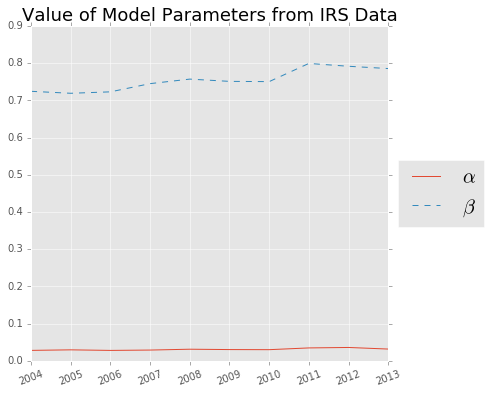

In [101]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
plt.plot(yearRange,alphaVals,linestyle="-",label="$\\alpha$")
plt.plot(yearRange,betaVals,linestyle="--",label="$\\beta$")
plt.ylim([0,0.9])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
ax.set_xticklabels(yearRange,rotation=20, ha="center")
plt.title("Value of Model Parameters from IRS Data",size=18)
#ax.tick_params(axis='both', which='major', labelsize=15, color='k', labelcolor='k')
plt.savefig("/home/caleb/Dropbox/CalebBistra/Reports/MigrationModelingSanity_Report_8_29_2016/figures/parameters_over_time.png", dpi=100)
plt.show()